## IMPLEMENTAÇÃO DE REDES NEURAIS

Disciplina: Tópicos Especiais em Inteligência Artificial

Discente: Douglas Wilian Lima Silva

Docente: José Alfredo


![divider](https://webstockreview.net/images/divider-clipart-design-line-5.png)

### BASE WINE

In [1]:
#Bibliotecas utilizadas

import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
wine = load_wine()

df = pd.DataFrame(data = wine['data'], columns = wine['feature_names'])
Zscore = MinMaxScaler()
dfn = pd.DataFrame(Zscore.fit_transform(df), columns = df.columns)
dfn['target'] = wine.target

dfn.head() # Visualização do DataFrame normalizado

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0


In [3]:
#Separação das classes de treinamento e teste

i = np.random.permutation(dfn.shape[0])
d = int(0.4*len(i)) # 40% dos termos

train, test = i[:d], i[d:]

ctrain, ctest = dfn.loc[train,:], dfn.loc[test,:]

xtrain = ctrain.drop('target', axis=1)
ytrain = ctrain.target

xtest = ctest.drop('target', axis=1)
ytest = ctest.target

xtrain.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
155,0.563158,0.879447,0.513369,0.587629,0.250000,0.262069,0.061181,0.905660,0.359621,0.564846,0.097561,0.076923,0.318830
111,0.392105,0.333992,0.433155,0.536082,0.195652,0.541379,0.407173,0.245283,0.255521,0.061433,0.341463,0.553114,0.033524
40,0.665789,0.191700,0.508021,0.288660,0.510870,0.748276,0.622363,0.396226,0.608833,0.413823,0.382114,0.772894,0.368759
100,0.276316,0.264822,0.181818,0.355670,0.293478,0.431034,0.386076,0.245283,0.312303,0.172355,0.642276,0.619048,0.308131
91,0.255263,0.152174,0.566845,0.587629,0.173913,0.162069,0.191983,0.698113,0.384858,0.197952,0.463415,0.505495,0.122682


In [4]:
classifier = MLPClassifier(hidden_layer_sizes=(64, 32), activation = 'relu', solver = 'lbfgs')

classifier.fit(xtrain, ytrain)

ypred = classifier.predict(xtest)

acuracia = accuracy_score(ytest, ypred)

print(f'A acurácia do modelo é {acuracia*100:.3f} %')

cm = confusion_matrix(ytest, ypred)

A acurácia do modelo é 95.327 %


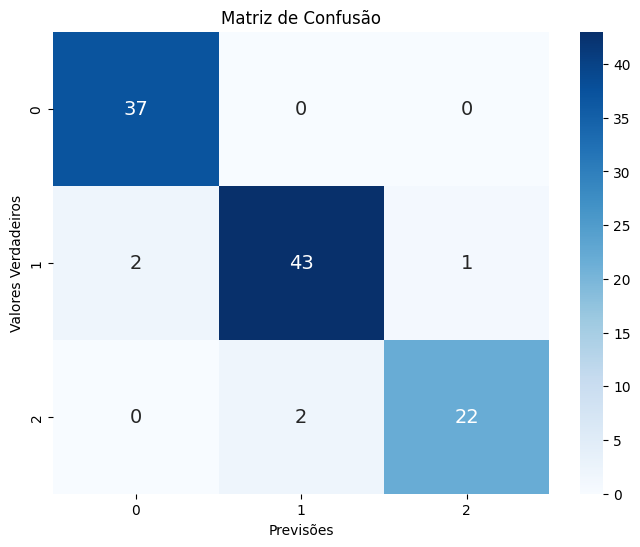

In [5]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})
plt.xlabel('Previsões')
plt.ylabel('Valores Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()

### BASE HEART DESEASE

In [17]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

dfheart = pd.read_csv('/content/heart.csv')

Zscore = MinMaxScaler()
dfnheart = pd.DataFrame(Zscore.fit_transform(dfheart), columns=dfheart.columns)

dfnheart.target = dfheart.target

dfnheart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1.0,0.0,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000,0
1,0.500000,1.0,0.0,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000,0
2,0.854167,1.0,0.0,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000,0
3,0.666667,1.0,0.0,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000,0
4,0.687500,0.0,0.0,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667,0


In [18]:
#Separação das classes de treinamento e teste

i1 = np.random.permutation(dfnheart.shape[0])
d1 = int(0.4*len(i)) # 40% dos termos

train1, test1 = i[:d], i[d:]

ctrain1, ctest1 = dfnheart.loc[train,:], dfnheart.loc[test,:]

xtrain1 = ctrain1.drop('target', axis=1)
ytrain1 = ctrain1.target

xtest1 = ctest1.drop('target', axis=1)
ytest1 = ctest1.target

xtrain1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
155,0.520833,1.0,0.333333,0.132075,0.417808,0.0,0.5,0.648855,0.0,0.000000,1.0,0.0,1.000000
111,0.500000,1.0,0.000000,0.452830,0.228311,0.0,0.0,0.305344,1.0,0.000000,1.0,0.0,1.000000
40,0.750000,0.0,0.666667,0.622642,0.534247,0.0,0.0,0.610687,0.0,0.129032,1.0,0.0,0.666667
100,0.291667,0.0,0.666667,0.264151,0.198630,0.0,0.5,0.717557,0.0,0.032258,0.5,0.0,0.666667
91,0.687500,0.0,0.000000,0.283019,0.189498,0.0,0.5,0.702290,0.0,0.000000,1.0,0.0,0.666667


In [21]:
clf = MLPClassifier(hidden_layer_sizes=(64,32), activation='relu', solver='lbfgs')
clf.fit(xtrain1, ytrain1)

ypred1 = clf.predict(xtest1)

acuracia1 = accuracy_score(ytest1, ypred1)

print(f'A acurácia do modelo é {acuracia1*100:.3f} %')

cm1 = confusion_matrix(ytest1, ypred1)

A acurácia do modelo é 78.505 %


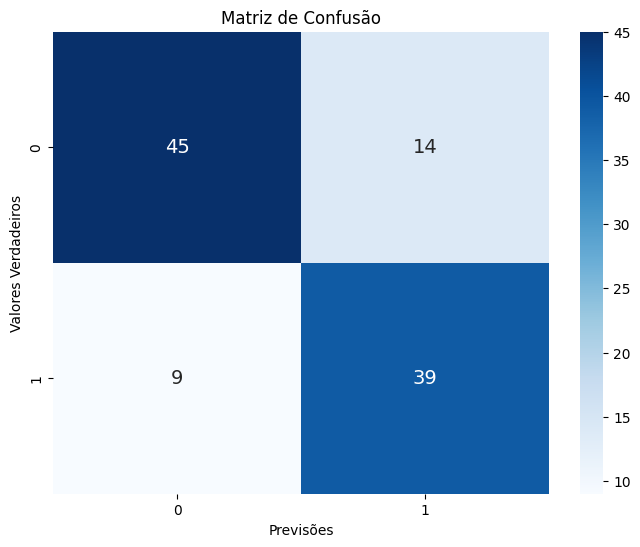

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})
plt.xlabel('Previsões')
plt.ylabel('Valores Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()